## Project: Color Quantization using KMeans (Clustering)
-------------------
### Aim: 
**To build a model which can compress images using KMeans Clustering.**

--------------------
### Steps:
#### 1. Import the image as 3D array (3 dimensions are: Height, Width, Color channels) using Matplotlib Library
#### 2. Convert the image from 3D array to 2D array using Numpy library.
#### 3. This 2D array act as dataset with 3 columns (Red, Green, Blue) and each data point is a unique pixel of the image.
#### 4. Selecting the number of colors that we want to reduce our image to (= Number of clusters in KMeans)
#### 5. Predicting the cluster label for each data point (pixel) using Scikit Learn KMeans Clustering algorithm.
#### 6. Assigning each point within a cluster with the particular centroid R,G,B value of that cluster. 
#### 7. Converting back the new 2D array (which contains the new assigned R,G,B value for each pixel) to 3D array
#### 8. Exporting this 3D array as compressed image.


In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib.image as mpimg

In [4]:
image_as_array = mpimg.imread('../DATA/palm_trees.jpg')

In [5]:
image_as_array.shape #(H,W,C)

(1401, 934, 3)

In [6]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

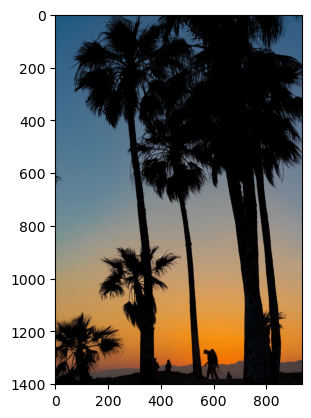

In [7]:
plt.imshow(image_as_array)
plt.show()

In [8]:
(h,w,c) = image_as_array.shape

In [9]:
h

1401

In [10]:
w

934

In [11]:
c

3

In [12]:
image_2d_array = image_as_array.reshape(h*w,c)

In [13]:
image_2d_array

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [14]:
from sklearn.cluster import KMeans

In [15]:
model = KMeans(n_clusters = 6)

In [16]:
labels = model.fit_predict(image_2d_array)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
labels

array([5, 5, 5, ..., 2, 2, 2])

In [18]:
model.cluster_centers_

array([[ 67.25337203,  61.54496264,  62.01242432],
       [136.73533325, 143.74401484, 143.9844705 ],
       [  2.75659154,   2.57529968,   3.70012508],
       [219.02710886, 135.42650506,  47.00342746],
       [191.45660313, 154.52547084, 109.63137723],
       [ 71.12526864, 109.27679682, 137.69417556]])

In [19]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [20]:
rgb_codes

array([[ 67,  62,  62],
       [137, 144, 144],
       [  3,   3,   4],
       [219, 135,  47],
       [191, 155, 110],
       [ 71, 109, 138]])

In [21]:
labels

array([5, 5, 5, ..., 2, 2, 2])

In [22]:
rgb_codes[labels]

array([[ 71, 109, 138],
       [ 71, 109, 138],
       [ 71, 109, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [34]:
quantized_image = np.reshape(rgb_codes[labels],(h,w,c))

In [35]:
quantized_image

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

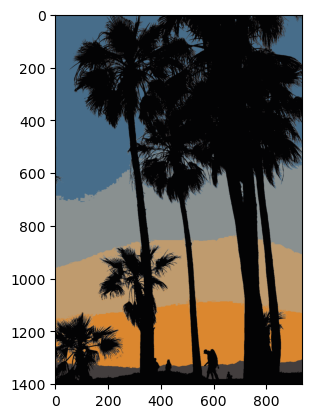

In [36]:
plt.imshow(quantized_image)
plt.show()

In [45]:
quantized_image1 = np.asarray(quantized_image, dtype=np.uint8)

In [47]:
mpimg.imsave('C:\\Users\\hp\\Desktop\\quantized_img.jpg',quantized_image1)